In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn import svm

In [2]:
df_17to19 = pd.read_csv("./match_data_2017-2019.csv") # 訓練データ
df_17to19

,Sec,Date,Home,Away,HomeID,W/L,AwayID,HomeGF,AwayGF,Stadium,Attendances
0,1,2017-02-25 00:00:00,yokohama-fa-marinos,urawa-red-diamonds,8,1,4,3,2,日産ス,39284
1,1,2017-02-25 00:00:00,shimizu-s-pulse,vissel-kobe,11,2,15,0,1,アイスタ,17861
2,1,2017-02-25 00:00:00,kashima-antlers,fc-tokyo,3,2,6,0,1,カシマ,28240
3,1,2017-02-25 00:00:00,vegalta-sendai,consadole-sapporo,2,1,1,1,0,ユアスタ,17230
4,1,2017-02-25 00:00:00,sanfrecce-hiroshima,other,16,0,0,1,1,Ｅスタ,17545
...,...,...,...,...,...,...,...,...,...,...,...
897,34,2019-12-07 00:00:00,yokohama-fa-marinos,fc-tokyo,8,1,6,3,0,日産ス,63854
898,34,2019-12-07 00:00:00,vissel-kobe,other,15,1,0,4,1,ノエスタ,25243
899,34,2019-12-07 00:00:00,oita-trinita,cerezo-osaka,18,2,14,0,2,昭和電ド,17233
900,34,2019-12-07 00:00:00,urawa-red-diamonds,gamba-osaka,4,2,13,2,3,埼玉,47188


In [3]:
df_20 = pd.read_csv("./match_data_2020.csv") # テストデータ
df_20

,Sec,Date,Home,Away,HomeID,W/L,AwayID,HomeGF,AwayGF,Stadium,Attendances
0,1,2020-02-21 00:00:00,shonan-bellmare,urawa-red-diamonds,10,2,4,2,3,ＢＭＷス,13071
1,1,2020-02-22 00:00:00,vegalta-sendai,nagoya-grampus-eight,2,0,12,1,1,ユアスタ,13968
2,1,2020-02-22 00:00:00,cerezo-osaka,oita-trinita,14,1,18,1,0,ヤンマー,15535
3,1,2020-02-22 00:00:00,kashiwa-reysol,consadole-sapporo,5,1,1,4,2,三協Ｆ柏,12468
4,1,2020-02-22 00:00:00,kawasaki-frontale,sagan-tosu,7,0,17,0,0,等々力,21117
...,...,...,...,...,...,...,...,...,...,...,...
301,34,2020-12-19 00:00:00,kashima-antlers,cerezo-osaka,3,0,14,1,1,カシマ,11251
302,34,2020-12-19 00:00:00,nagoya-grampus-eight,sanfrecce-hiroshima,12,1,16,1,0,豊田ス,16825
303,34,2020-12-19 00:00:00,sagan-tosu,oita-trinita,17,0,18,2,2,駅スタ,8966
304,34,2020-12-19 00:00:00,fc-tokyo,vissel-kobe,6,1,15,1,0,味スタ,14373


In [4]:
df_14to16_pts = pd.read_csv("./results_2014_2016.csv") # 訓練データの過去の対戦成績
df_14to16_pts

,HomeClub,AwayClub,HomeClubID,AwayClubID,Won,Drawn,Lost,Points/M,GF,GA,GD
0,fc-tokyo,vegalta-sendai,6,2,5,1,1,2.29,13,6,7
1,fc-tokyo,nagoya-grampus-eight,6,12,1,3,2,1.00,6,7,-1
2,fc-tokyo,kawasaki-frontale,6,7,1,1,4,0.67,4,12,-8
3,fc-tokyo,sanfrecce-hiroshima,6,16,3,2,2,1.57,7,6,1
4,fc-tokyo,kashiwa-reysol,6,5,3,1,2,1.67,8,4,4
...,...,...,...,...,...,...,...,...,...,...,...
220,gamba-osaka,shonan-bellmare,13,10,3,1,0,2.50,8,4,4
221,gamba-osaka,vissel-kobe,13,15,5,2,2,1.89,17,7,10
222,gamba-osaka,sagan-tosu,13,17,3,1,3,1.43,10,8,2
223,gamba-osaka,kashima-antlers,13,3,5,0,3,1.88,12,11,1


In [5]:
df_17to19_pts = pd.read_csv("./results_2017_2019.csv") # テストデータの過去の対戦成績
df_17to19_pts 

,HomeClub,AwayClub,HomeClubID,AwayClubID,Won,Drawn,Lost,Points/M,GF,GA,GD
0,fc-tokyo,vegalta-sendai,6,2,4,1,6,1.18,11,10,1
1,fc-tokyo,nagoya-grampus-eight,6,12,4,0,0,3.00,8,4,4
2,fc-tokyo,oita-trinita,6,18,2,0,0,3.00,5,1,4
3,fc-tokyo,kawasaki-frontale,6,7,2,2,4,1.00,7,13,-6
4,fc-tokyo,sanfrecce-hiroshima,6,16,5,1,2,2.00,9,5,4
...,...,...,...,...,...,...,...,...,...,...,...
257,gamba-osaka,shonan-bellmare,13,10,3,0,1,2.25,5,1,4
258,gamba-osaka,vissel-kobe,13,15,3,2,3,1.38,11,10,1
259,gamba-osaka,sagan-tosu,13,17,4,0,2,2.00,11,7,4
260,gamba-osaka,kashima-antlers,13,3,0,3,3,0.50,5,8,-3


In [6]:
# 1試合あたりの勝ち点と得失点数の空カラム(Points/M､GD)を作成
df_17to19.insert(11, "Points/M", np.nan)
df_17to19.insert(12,"GD",np.nan)

df_20.insert(11, "Points/M", np.nan)
df_20.insert(12,"GD",np.nan)

In [7]:
# Points/M､GDに値を格納
for index,row in df_17to19.iterrows():
    for i,r in df_14to16_pts.iterrows():
        if row["HomeID"] == r["HomeClubID"] and row["AwayID"] == r["AwayClubID"] :
            df_17to19.at[index,"Points/M"] = r["Points/M"]
            df_17to19.at[index,"GD"] = r["GD"]
            
for index,row in df_20.iterrows():
    for i,r in df_17to19_pts.iterrows():
        if row["HomeID"] == r["HomeClubID"] and row["AwayID"] == r["AwayClubID"] :
            df_20.at[index,"Points/M"] = r["Points/M"]
            df_20.at[index,"GD"] = r["GD"]

In [8]:
# NaNのある行を削除
df_17to19 = df_17to19.dropna(how='any')
df_17to19

,Sec,Date,Home,Away,HomeID,W/L,AwayID,HomeGF,AwayGF,Stadium,Attendances,Points/M,GD
0,1,2017-02-25 00:00:00,yokohama-fa-marinos,urawa-red-diamonds,8,1,4,3,2,日産ス,39284,0.83,1.0
1,1,2017-02-25 00:00:00,shimizu-s-pulse,vissel-kobe,11,2,15,0,1,アイスタ,17861,1.17,-6.0
2,1,2017-02-25 00:00:00,kashima-antlers,fc-tokyo,3,2,6,0,1,カシマ,28240,1.67,4.0
5,1,2017-02-25 00:00:00,sagan-tosu,kashiwa-reysol,17,2,5,1,3,ベアスタ,14355,1.71,1.0
9,2,2017-03-04 00:00:00,urawa-red-diamonds,cerezo-osaka,4,1,14,3,1,埼玉,43826,1.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,34,2019-12-07 00:00:00,shimizu-s-pulse,sagan-tosu,11,1,17,1,0,アイスタ,15756,0.60,-3.0
896,34,2019-12-07 00:00:00,nagoya-grampus-eight,kashima-antlers,12,2,3,0,1,豊田ス,33133,0.57,-7.0
897,34,2019-12-07 00:00:00,yokohama-fa-marinos,fc-tokyo,8,1,6,3,0,日産ス,63854,0.83,-2.0
899,34,2019-12-07 00:00:00,oita-trinita,cerezo-osaka,18,2,14,0,2,昭和電ド,17233,0.50,-2.0


In [9]:
df_20 = df_20.dropna(how='any')
df_20

,Sec,Date,Home,Away,HomeID,W/L,AwayID,HomeGF,AwayGF,Stadium,Attendances,Points/M,GD
0,1,2020-02-21 00:00:00,shonan-bellmare,urawa-red-diamonds,10,2,4,2,3,ＢＭＷス,13071,2.50,3.0
1,1,2020-02-22 00:00:00,vegalta-sendai,nagoya-grampus-eight,2,0,12,1,1,ユアスタ,13968,2.00,3.0
2,1,2020-02-22 00:00:00,cerezo-osaka,oita-trinita,14,1,18,1,0,ヤンマー,15535,1.75,3.0
4,1,2020-02-22 00:00:00,kawasaki-frontale,sagan-tosu,7,0,17,0,0,等々力,21117,2.00,4.0
5,1,2020-02-23 00:00:00,shimizu-s-pulse,fc-tokyo,11,2,6,1,3,アイスタ,17549,1.00,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,34,2020-12-19 00:00:00,gamba-osaka,shimizu-s-pulse,13,2,11,0,2,パナスタ,15252,1.75,3.0
301,34,2020-12-19 00:00:00,kashima-antlers,cerezo-osaka,3,0,14,1,1,カシマ,11251,2.50,6.0
302,34,2020-12-19 00:00:00,nagoya-grampus-eight,sanfrecce-hiroshima,12,1,16,1,0,豊田ス,16825,1.83,2.0
303,34,2020-12-19 00:00:00,sagan-tosu,oita-trinita,17,0,18,2,2,駅スタ,8966,0.50,-2.0


In [10]:
# 入力データ(Points/M､GD)
X_train=df_17to19.drop(["Sec","Date","W/L","Home","Away","HomeID","AwayID","HomeGF","AwayGF","Stadium","Attendances"],axis=1).values
X_train

array([[ 0.83,  1.  ],
       [ 1.17, -6.  ],
       [ 1.67,  4.  ],
       ...,
       [ 0.83, -2.  ],
       [ 0.5 , -2.  ],
       [ 1.71,  2.  ]])

In [11]:
#  出力データ(勝敗)
y_train =df_17to19["W/L"].values
y_train

array([1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1,
       0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 0,
       1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0,
       0, 2, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2,
       0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2,
       0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       0, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2, 1,

Text(0, 0.5, 'Goal difference')

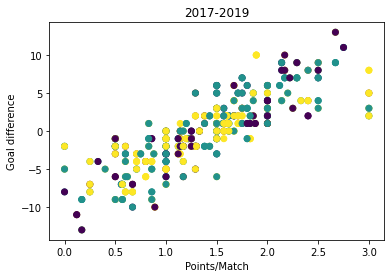

In [20]:
plt.scatter(X_train[:, 0],X_train[:, 1], c = y_train)
plt.title("2017-2019")
plt.xlabel("Points/Match")
plt.ylabel("Goal difference")

In [21]:
X_test=df_20.drop(["Sec","Date","W/L","Home","Away","HomeID","AwayID","HomeGF","AwayGF","Stadium","Attendances"],axis=1).values
X_test

array([[  2.5 ,   3.  ],
       [  2.  ,   3.  ],
       [  1.75,   3.  ],
       [  2.  ,   4.  ],
       [  1.  ,  -3.  ],
       [  1.33,  -1.  ],
       [  2.  ,   8.  ],
       [  1.75,   2.  ],
       [  3.  ,   6.  ],
       [  2.  ,   2.  ],
       [  1.71,   2.  ],
       [  1.9 ,  10.  ],
       [  1.17,  -3.  ],
       [  0.5 ,  -7.  ],
       [  0.71,  -6.  ],
       [  1.17,  -2.  ],
       [  0.33, -10.  ],
       [  0.5 ,  -1.  ],
       [  1.  ,  -7.  ],
       [  2.  ,   1.  ],
       [  1.86,   2.  ],
       [  2.17,   3.  ],
       [  1.  ,  -6.  ],
       [  2.5 ,   5.  ],
       [  1.25,  -1.  ],
       [  1.  ,  -3.  ],
       [  1.71,   0.  ],
       [  1.33,   3.  ],
       [  0.62,  -3.  ],
       [  1.62,   0.  ],
       [  1.25,  -3.  ],
       [  1.75,   6.  ],
       [  0.5 ,  -3.  ],
       [  1.43,  -3.  ],
       [  1.  ,  -1.  ],
       [  0.5 ,  -1.  ],
       [  0.83,  -4.  ],
       [  1.5 ,   0.  ],
       [  1.  , -10.  ],
       [  1.67,   3.  ],


In [22]:
y_test =df_20["W/L"].values
y_test

array([2, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0,
       2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2,
       2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1,
       0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1,
       0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 1])

Text(0, 0.5, 'Goal difference')

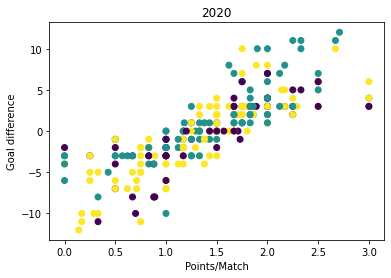

In [48]:
plt.scatter(X_test[:, 0],X_test[:, 1], c=y_test)
plt.title("2020")
plt.xlabel("Points/Match")
plt.ylabel("Goal difference")


In [49]:
linear_svm = svm.LinearSVC(max_iter=10000000).fit(X_train,y_train)

In [50]:
linear_svm.predict(X_test) #予測結果

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
y_test # 実際の結果(答え)

array([2, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0,
       2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2,
       2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1,
       0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1,
       0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 1])

In [52]:
linear_svm.score(X_test,y_test) # 精度

0.4312977099236641

In [53]:
linear_svm.decision_function(X_test) 

array([[-0.5710943 , -0.19748667, -0.23759437],
       [-0.55675267, -0.16288926, -0.28194592],
       [-0.54958186, -0.14559056, -0.3041217 ],
       [-0.54574419, -0.14866096, -0.3061409 ],
       [-0.59412032, -0.17906423, -0.22547919],
       [-0.58156883, -0.17344193, -0.24459711],
       [-0.50171025, -0.09174777, -0.40292079],
       [-0.56059034, -0.15981886, -0.27992673],
       [-0.55241048, -0.18939918, -0.26582773],
       [-0.56776116, -0.17711756, -0.25775095],
       [-0.55944301, -0.15705106, -0.28347485],
       [-0.47682495, -0.0563717 , -0.46018105],
       [-0.59899647, -0.19082735, -0.21039966],
       [-0.62381263, -0.20138002, -0.17305085],
       [-0.61882763, -0.20168263, -0.17861817],
       [-0.58798799, -0.17659906, -0.23459464],
       [-0.65196193, -0.23230179, -0.11554546],
       [-0.55776172, -0.11601023, -0.31822069],
       [-0.63815426, -0.23597742, -0.1286993 ],
       [-0.57876964, -0.19134586, -0.23355598],
       [-0.5637455 , -0.16743029, -0.270

In [54]:
from sklearn.ensemble import RandomForestClassifier 

In [55]:
# ランダムフォレスト
rf= RandomForestClassifier(max_depth=5)  

In [56]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [57]:
y_pred = rf.predict(X_test)

In [58]:
y_pred

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 2, 2,
       1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1])

In [63]:
rf.score(X_test,y_test) 

0.41603053435114506

In [60]:
pd.value_counts(y_test)

2    107
1     98
0     57
dtype: int64

In [67]:
# from sklearn.dummy import DummyClassifier
# dc = DummyClassifier(strategy="stratified")
# dc.fit(X_train,y_train).score(X_test,y_test) # ランダムで勝敗(0,1,2)を予測したときの精度

In [76]:
# 10000通りダミーで勝敗(0,1,2)を予測し精度を出すことで､ベースラインを生成
dc_scores = []
for _ in range(10000):
    dc = DummyClassifier(strategy = 'stratified')
    dc.fit(X_train,y_train)
    dc_score= dc.score(X_test,y_test)
    dc_scores.append(dc_score)
np.mean(dc_scores)

0.35294503816793893